# Sieci Neuronowe, PWR 2023
## Klasyfikacja roślin na podstawie zdjęć za pomocą sieci neuronowych
Autorzy:
- Dominik Ćwikowski 248914
- Paweł Pelar 243480  

Repozytorium:  
- https://github.com/F3mte/P-Sieci-Neuronowe

Zbiór danych:  
- https://www.kaggle.com/datasets/marquis03/plants-classification

In [10]:
# Import bibliotek i funkcji
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [11]:
# Określ ścieżki do folderów z plikami 
test_dir = "test"
train_dir = "train"
val_dir = "val"

In [12]:
# Generator dla danych treningowych
train_datagen = ImageDataGenerator(rescale=1./255,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   rotation_range=180,
                                   fill_mode='reflect')
train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))

Found 21000 images belonging to 30 classes.


In [13]:
# Generator dla danych testowych
test_datagen = ImageDataGenerator(rescale=1./255,)
test_generator = test_datagen.flow_from_directory(directory=test_dir,
                                                  class_mode='categorical',
                                                  target_size=(224, 224))

Found 6000 images belonging to 30 classes.


In [14]:
# Generator dla danych walidacyjnych
validation_datagen = ImageDataGenerator(rescale=1./255,)
validation_generator = validation_datagen.flow_from_directory(directory=val_dir,
                                                              class_mode = 'categorical',
                                                              target_size=(224, 224))

Found 3000 images belonging to 30 classes.


(1, 32, 224, 224, 3)
(32, 224, 224, 3)


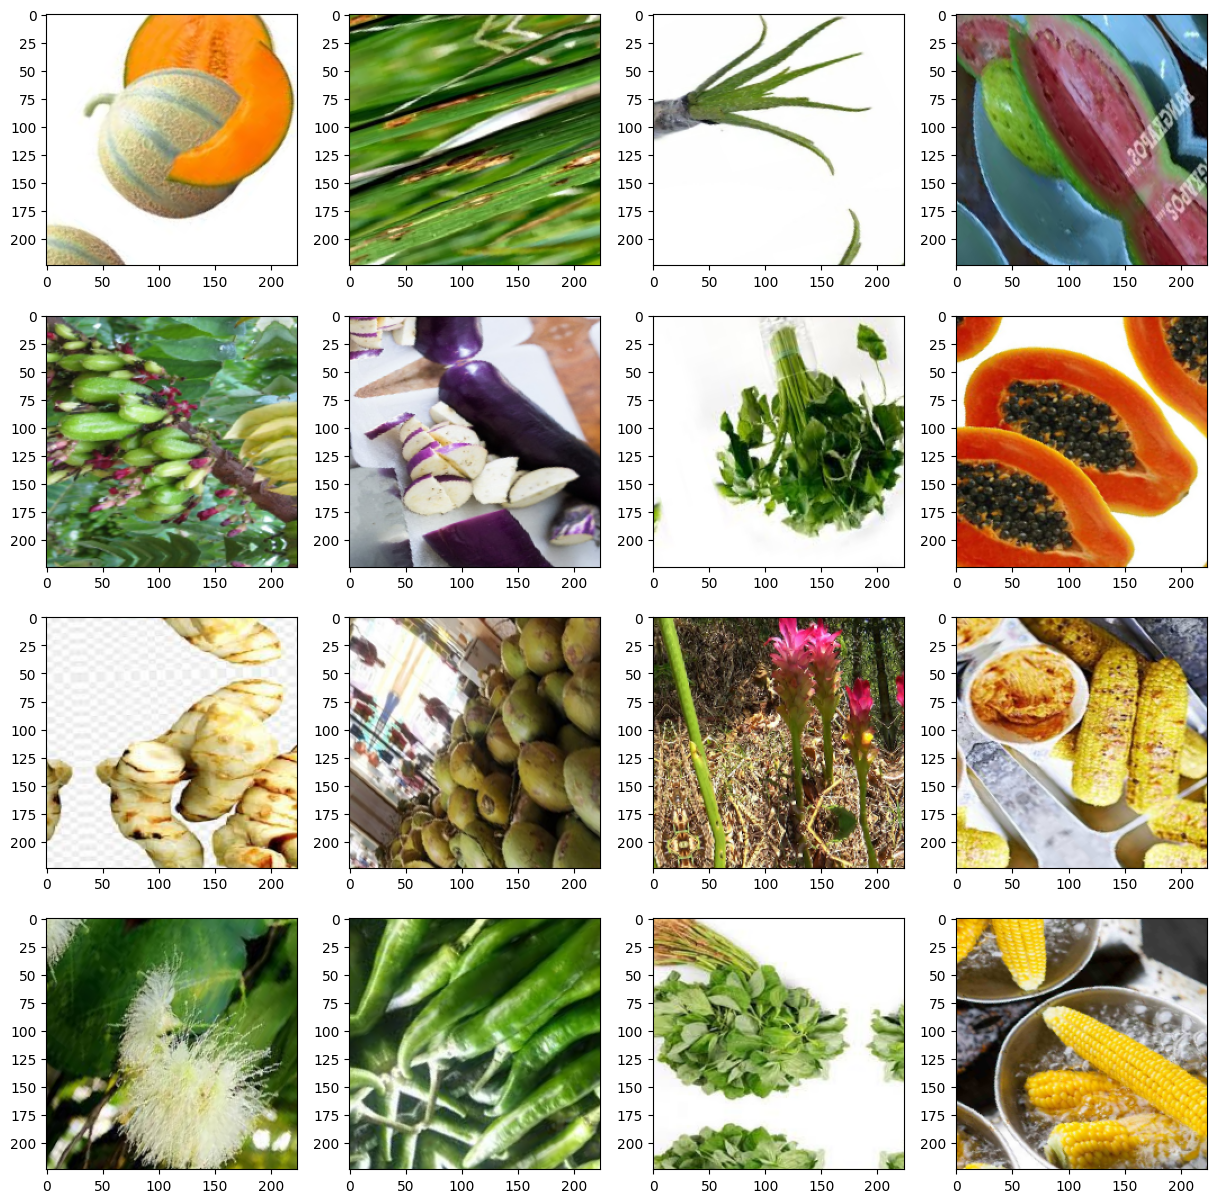

In [15]:
x_train = []
c = 0
for feature, label in train_generator:
    x_train.append(np.array(feature))
    c += 1
    if c == 1:
        break

x_train = np.array(x_train)
print(x_train.shape)
x_train = np.reshape(x_train, (32, 224, 224, 3))
print(x_train.shape)

fig, ax = plt.subplots(4, 4, figsize=(15, 15))
for i in range(0, 16):
    ax[int(i / 4), (i % 4)].imshow(x_train[i])

# Proponowana architektura

Input 224x224x3  

Conv2D 64, 3x3, relu  
MaxPooling 2x2  

Conv2D 64, 3x3, relu  
MaxPooling 2x2  

Conv2D 64, 3x3, relu  
MaxPooling 2x2  

Flatten  
Dropout (0.2 - 0.5)  

Dense 4096, relu  
Dropout (0.2 - 0.5) 

Dense 30, softmax  

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Definiowanie modelu z podaną architekturą
model = Sequential([
    # Warstwa wejściowa: Input 224x224x3 jest domyślnie określona przez target_size w generatorze
    # Pierwsza warstwa konwolucyjna
    Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    # Druga warstwa konwolucyjna
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Trzecia warstwa konwolucyjna
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Spłaszczanie danych do jednowymiarowej tablicy
    Flatten(),

    # Dropout (0.2 - 0.5), użyjemy średniej wartości 0.35
    Dropout(0.35),

    # Pierwsza warstwa gęsta
    Dense(4096, activation='relu'),
    Dropout(0.35),

    # Warstwa wyjściowa
    Dense(30, activation='softmax')
])

# Podsumowanie modelu
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 64)       

# Trenowanie modelu

In [18]:
# Kompilacja modelu
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Callback do zapisywania najlepszego modelu
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

# Trenowanie modelu
history = model.fit(
    train_generator,
    epochs=10, 
    validation_data=validation_generator,
    callbacks=[checkpoint]
)

# Zapisanie całego modelu
model.save('final_model.keras')

Epoch 1/10
657/657 [==============================] - 633s 962ms/step - loss: 2.5780 - accuracy: 0.2363 - val_loss: 2.3586 - val_accuracy: 0.2993
Epoch 2/10
657/657 [==============================] - 649s 986ms/step - loss: 2.3578 - accuracy: 0.2967 - val_loss: 2.1379 - val_accuracy: 0.3737
Epoch 3/10
657/657 [==============================] - 626s 953ms/step - loss: 2.2340 - accuracy: 0.3311 - val_loss: 2.0718 - val_accuracy: 0.4033
Epoch 4/10
657/657 [==============================] - 615s 936ms/step - loss: 2.1542 - accuracy: 0.3582 - val_loss: 1.9139 - val_accuracy: 0.4287
Epoch 5/10
657/657 [==============================] - 618s 940ms/step - loss: 2.0848 - accuracy: 0.3752 - val_loss: 1.8707 - val_accuracy: 0.4423
Epoch 6/10
657/657 [==============================] - 615s 935ms/step - loss: 2.0248 - accuracy: 0.3969 - val_loss: 1.7887 - val_accuracy: 0.4697
Epoch 7/10
657/657 [==============================] - 609s 927ms/step - loss: 1.9910 - accuracy: 0.4002 - val_loss: 1.7887 -

# Testowanie modelu

In [19]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Wczytanie modelu
model = load_model('final_model.keras')

# Testowanie modelu na danych testowych
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Generowanie przewidywań na danych testowych
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Etykiety rzeczywiste
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  

# Wyświetlanie raportu klasyfikacji
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Wyświetlanie macierzy pomyłek
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print(conf_matrix)


188/188 [==============================] - 28s 148ms/step - loss: 1.7312 - accuracy: 0.4762
Test Loss: 1.7312265634536743
Test Accuracy: 0.47616666555404663
188/188 [==============================] - 23s 121ms/step
               precision    recall  f1-score   support

     aloevera       0.02      0.02      0.02       200
       banana       0.03      0.04      0.03       200
      bilimbi       0.02      0.01      0.01       200
   cantaloupe       0.05      0.04      0.04       200
      cassava       0.04      0.07      0.05       200
      coconut       0.04      0.04      0.04       200
         corn       0.04      0.04      0.04       200
     cucumber       0.00      0.00      0.00       200
      curcuma       0.04      0.07      0.05       200
     eggplant       0.03      0.03      0.03       200
     galangal       0.02      0.01      0.02       200
       ginger       0.02      0.01      0.01       200
        guava       0.03      0.02      0.02       200
         kale 